<a href="https://colab.research.google.com/github/DhanvinS/ML_Models-Supervised-and-Unsupervised/blob/main/Decision_Tree_Gini_%26_info_gain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Data_Iris.csv to Data_Iris.csv


In [2]:
#importing required modules
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
#loading dataset
df = pd.read_csv("Data_Iris.csv")
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [7]:
#seperate data into independdent and target variables
x = df.iloc[:,0:4]
y = df["species_name"]

In [8]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 120, test_size = 30, stratify=y)

In [9]:
#creating a decision tree classifier using criterion gini
dt1 = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 25)

#creating a decision tree classifier using criterion entropy
dt2 = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 25)

In [14]:
#training the model
#gini model
dt1.fit(x_train, y_train)


DecisionTreeClassifier(min_samples_split=25)

In [15]:
#info gain / entropy model
dt2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=25)

In [18]:
y_predicted1 = dt1.predict(x_test)
#predict using gini model

In [19]:
y_predicted2 = dt2.predict(x_test)
#predict using the entropy model

Calculating accuracy for both

In [24]:
accuracy_gini = accuracy_score(y_test, y_predicted1)
accuracy_gini

0.9666666666666667

In [25]:
accuracy_entropy = accuracy_score(y_test, y_predicted2)
accuracy_entropy

0.9666666666666667

Plotting Confusion Matrix for Both

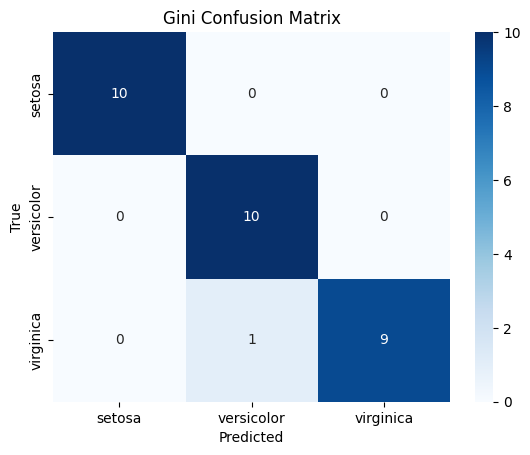

In [22]:
cm1 = confusion_matrix(y_test, y_predicted1, labels = dt1.classes_)
sb.heatmap(cm1, annot = True, cmap = "Blues", xticklabels = dt1.classes_, yticklabels=dt1.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gini Confusion Matrix')
plt.show()


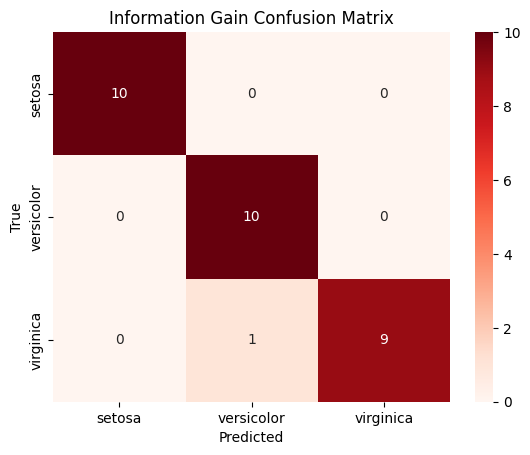

In [23]:
cm2 = confusion_matrix(y_test, y_predicted2, labels = dt2.classes_)
sb.heatmap(cm2, annot = True, cmap = "Reds", xticklabels = dt2.classes_, yticklabels=dt2.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Information Gain Confusion Matrix')
plt.show()


Decision Trees for both

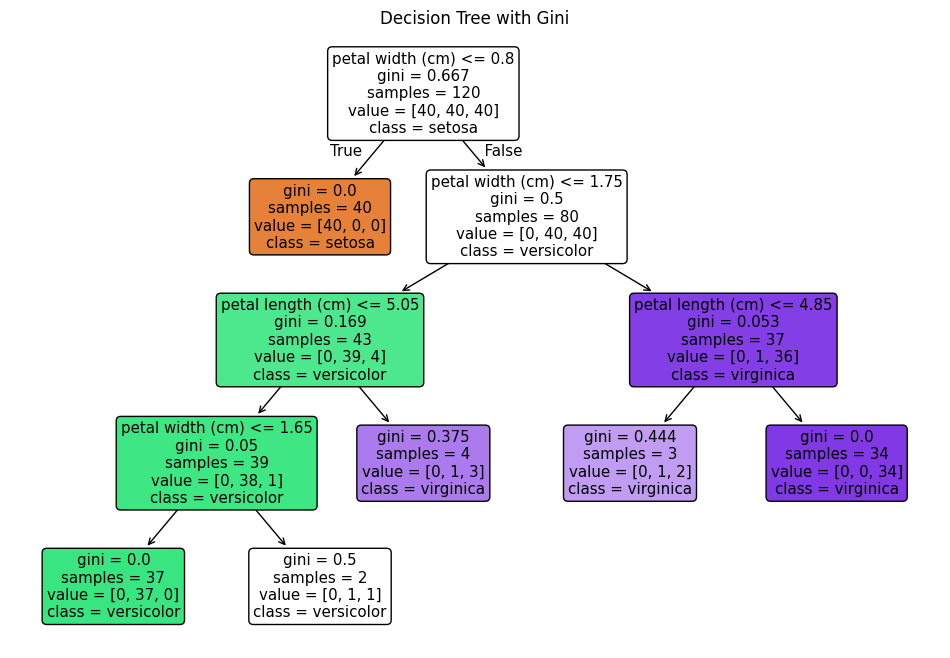

In [26]:
#gini decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt1, feature_names=x.columns, class_names= dt1.classes_,filled = True, rounded = True)
plt.title("Decision Tree with Gini")
plt.show()

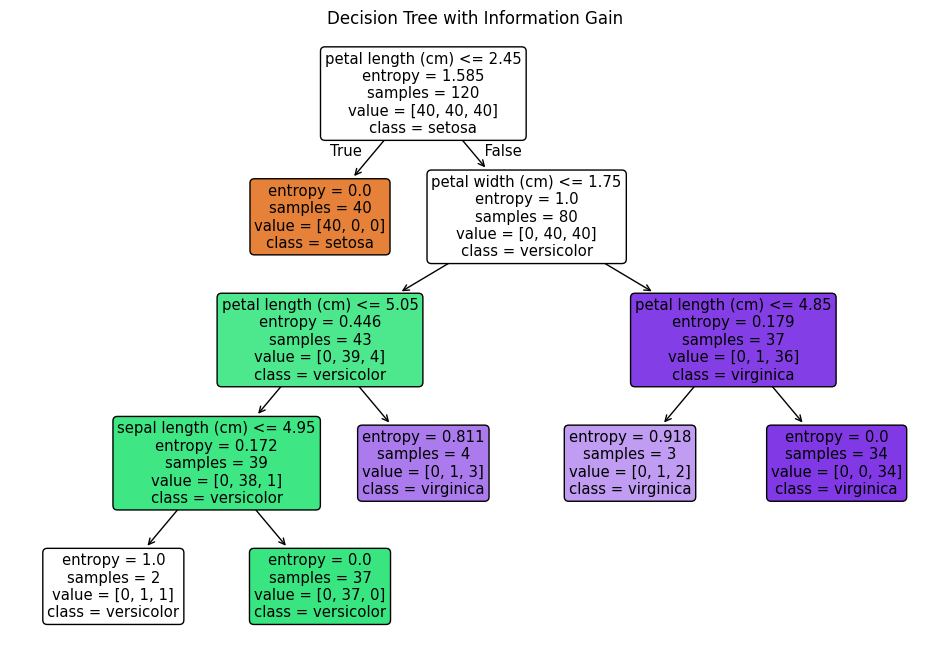

In [27]:
#entropy decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt2, feature_names=x.columns, class_names= dt2.classes_,filled = True, rounded = True)
plt.title("Decision Tree with Information Gain")
plt.show()